In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data_path = '/content/Updated for Analysis.xlsx'
df = pd.read_excel(data_path)

# Preprocessing
# Handle missing values
missing_percentage = df.isnull().mean() * 100
print("Missing Values Percentage:\n", missing_percentage)

# Fill missing values (example strategy)
df['Competitors'] = df['Competitors'].fillna('Unknown')
df['Development Stage'] = df['Development Stage'].fillna(df['Development Stage'].mode()[0])

# Standardize column names for ease
column_mapping = {
    'Product Line (Brief)': 'Product_Line_Brief',
    'Category (Small Molecule/Large Molecule/Other)': 'Category',
    'Product Line (Detailed)': 'Product_Line_Detailed',
    'Therapeutic Area': 'Therapeutic_Area',
    'Development Stage': 'Development_Stage'
}
df.rename(columns=column_mapping, inplace=True)

# Data Exploration
print("Data Overview:")
print(df.info())
print("Sample Data:")
print(df.head())

Missing Values Percentage:
 S No                                              0.0
Company                                           0.0
Product Line (Brief)                              0.0
Category (Small Molecule/Large Molecule/Other)    0.0
Product Line (Detailed)                           0.0
Therapeutic Area                                  0.0
Competitors                                       0.0
Tools                                             0.0
Primary Focus                                     0.0
Development Stage                                 0.0
dtype: float64
Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   S No                   146 non-null    int64 
 1   Company                146 non-null    object
 2   Product_Line_Brief     146 non-null    object
 3   Category               146 non-null  

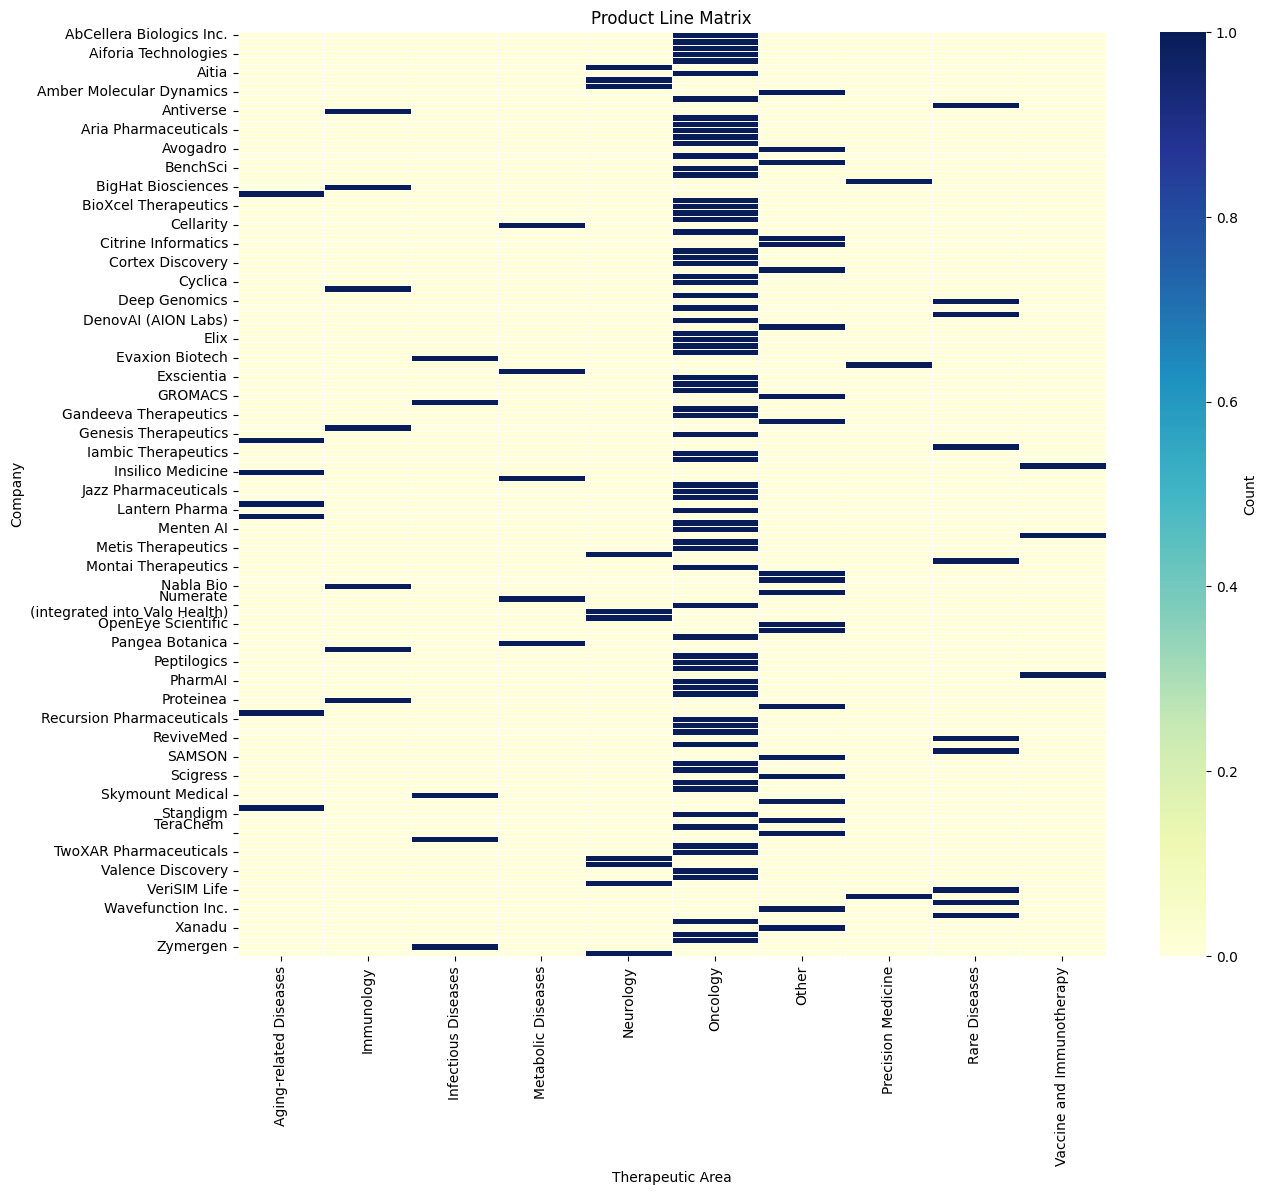

In [ ]:
# Heatmap: Product Line vs Therapeutic Area
heatmap_data = pd.crosstab(df['Company'], df['Therapeutic_Area'])
plt.figure(figsize=(14, 12))
sns.heatmap(heatmap_data, annot=False, cmap='YlGnBu', linewidths=.5, cbar_kws={'label': 'Count'})
plt.title('Product Line Matrix')
plt.xlabel('Therapeutic Area')
plt.ylabel('Company')
plt.show()

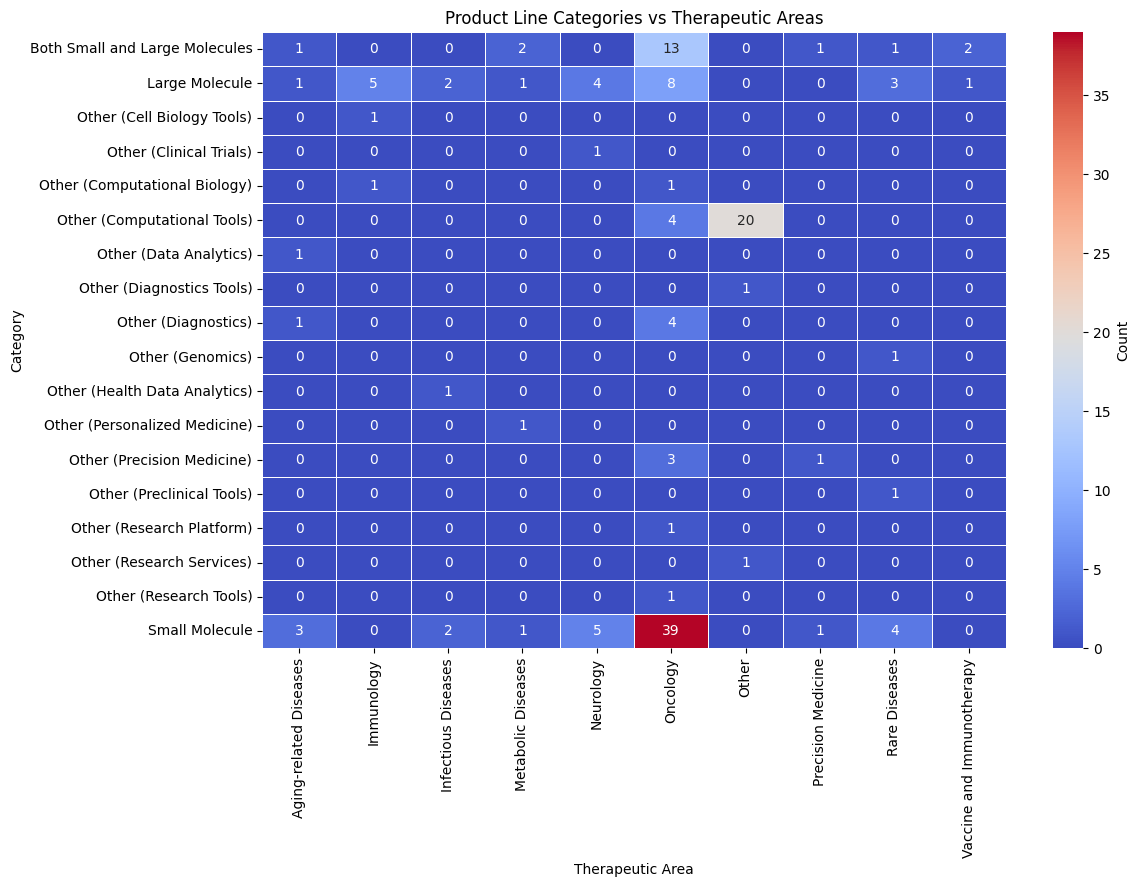

In [ ]:
# Heatmap: Product Line Category vs Therapeutic Area
heatmap_data = pd.crosstab(df['Category'], df['Therapeutic_Area'])
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=.5, cbar_kws={'label': 'Count'})
plt.title('Product Line Categories vs Therapeutic Areas')
plt.xlabel('Therapeutic Area')
plt.ylabel('Category')
plt.show()


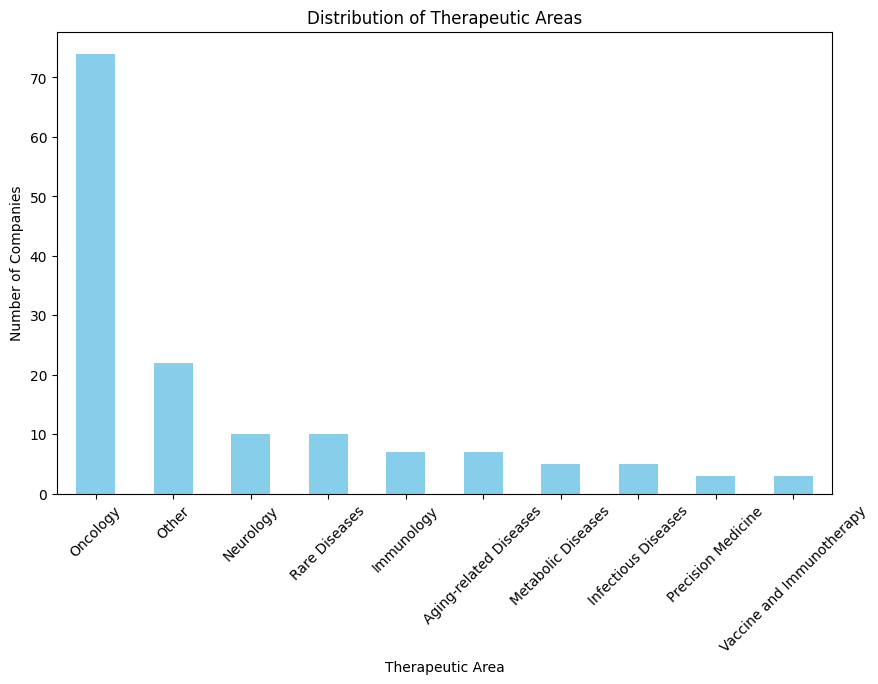

In [ ]:
# Bar Plot: Distribution of Therapeutic Areas
plt.figure(figsize=(10, 6))
df['Therapeutic_Area'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Therapeutic Areas')
plt.xlabel('Therapeutic Area')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.show()